Epoch 1/10
469/469 [==============================] - 82s 172ms/step - loss: 0.3091
Epoch 2/10
469/469 [==============================] - 80s 171ms/step - loss: 0.2134
Epoch 3/10
469/469 [==============================] - 83s 177ms/step - loss: 0.1632
Epoch 4/10
469/469 [==============================] - 84s 179ms/step - loss: 0.1291
Epoch 5/10
469/469 [==============================] - 80s 170ms/step - loss: 0.1023
Epoch 6/10
469/469 [==============================] - 80s 171ms/step - loss: 0.0802
Epoch 7/10
469/469 [==============================] - 80s 170ms/step - loss: 0.0625
Epoch 8/10
469/469 [==============================] - 80s 171ms/step - loss: 0.0497
Epoch 9/10
469/469 [==============================] - 80s 170ms/step - loss: 0.0409
Epoch 10/10
313/313 [==============================] - 5s 16ms/step


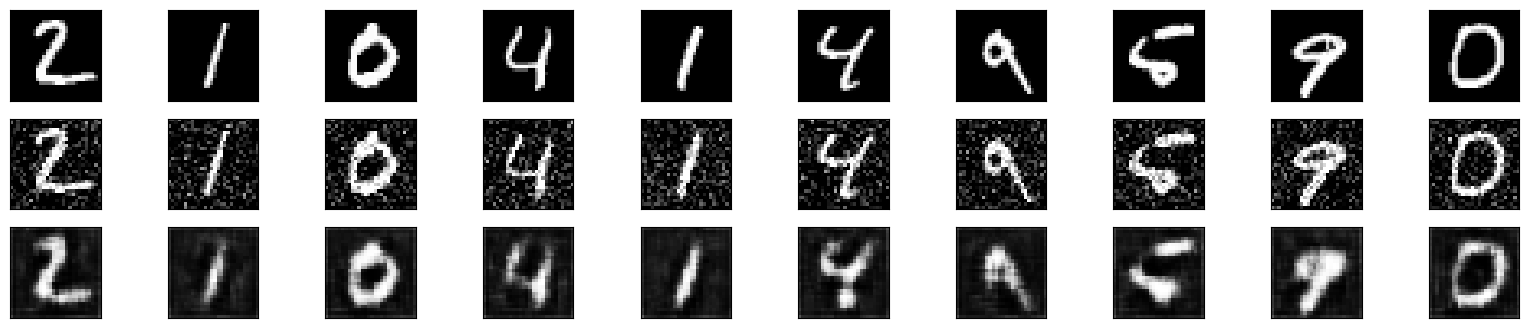

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, _), (test_images, _) = mnist.load_data()
# Normalize and reshape the images
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = train_images.reshape((len(train_images), 28, 28, 1))
test_images = test_images.reshape((len(test_images), 28, 28, 1))

# Add more noise to the images
noise_factor = 0.225  # Increase the noise factor
train_noisy = train_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_images.shape)
test_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)
train_noisy = np.clip(train_noisy, 0., 1.)
test_noisy = np.clip(test_noisy, 0., 1.)

# Create a deeper convolutional autoencoder model
input_img = Input(shape=(28, 28, 1))
x = Conv2D(64, (3, 3), padding='same')(input_img)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(128, (3, 3), padding='same')(encoded)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

# Train the autoencoder for 10 epochs
autoencoder.fit(train_noisy, train_images, epochs=10, batch_size=128, shuffle=True)

# Test the autoencoder
decoded_imgs = autoencoder.predict(test_noisy)

# Display the results
n = 10  # How many digits to display
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original images
    ax = plt.subplot(3, n, i)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(3, n, i + n)
    plt.imshow(test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(3, n, i + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()